# Introduction to Data Science
# HW04 - Data Modeling
---

(Latest update: 15/12/2024)

Student Name: Huỳnh Tấn Đạt

Student ID: 22127059

---

## 1. Introduction
### Objective

In this assignment, we aim to classify the quality of Portuguese **Vinho Verde** red wine using machine learning techniques. Building on the Exploratory Data Analysis (EDA) conducted in HW3, we will:
- Leverage insights from the EDA to prepare the dataset for modeling.
- Develop and fine-tune at least three classification models to predict wine quality.
- Address challenges such as an imbalanced dataset and limited samples.
- Evaluate and compare model performance using various metrics and visualizations.

Through this process, we seek to overcome the challenges posed by the dataset and build robust models that effectively classify wine quality.

---

### Import

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Data Preparation

### 2.1. Data Preprocessing

Load the **Wine Quality** dataset

In [2]:
data_path = "./winequality.csv"
data = pd.read_csv(data_path)

Display the first 5 rows of the dataset

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Information about dataset

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


Check for missing values in the dataset

In [5]:
data.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 2.2. Data Analysis and Visualization

Statistical measures of the dataset

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Analyzing wine quality via barplot

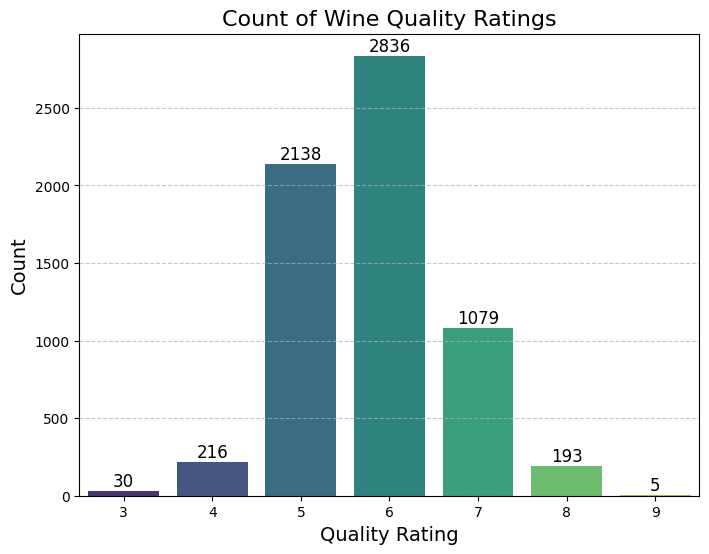

In [7]:
# Count quality ratings
quality_counts = data['quality'].value_counts().sort_index()

# Create a barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=quality_counts.index, y=quality_counts.values, palette='viridis')

# Annotate each bar with its count value
for i, count in enumerate(quality_counts.values):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12, color='black')

# Add labels and title
plt.title('Count of Wine Quality Ratings', fontsize=16)
plt.xlabel('Quality Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show();

**Insights**:

- **Imbalanced Quality Ratings**: Most wines are rated between 5 and 6, with very few samples rated as 3, 4, 8, or 9. This highlights class imbalance.
- **Common Quality Scores**:
    - **6** is the most frequent rating (2,836 samples), followed by 5 (2,138 samples).
    - Ratings of **7** and higher are much less common, indicating fewer high-quality wines.
- **Skewed Distribution:** The data is slightly skewed toward lower to moderate quality scores (5-6), which could influence model predictions.

Display correlations between all features via heatmap

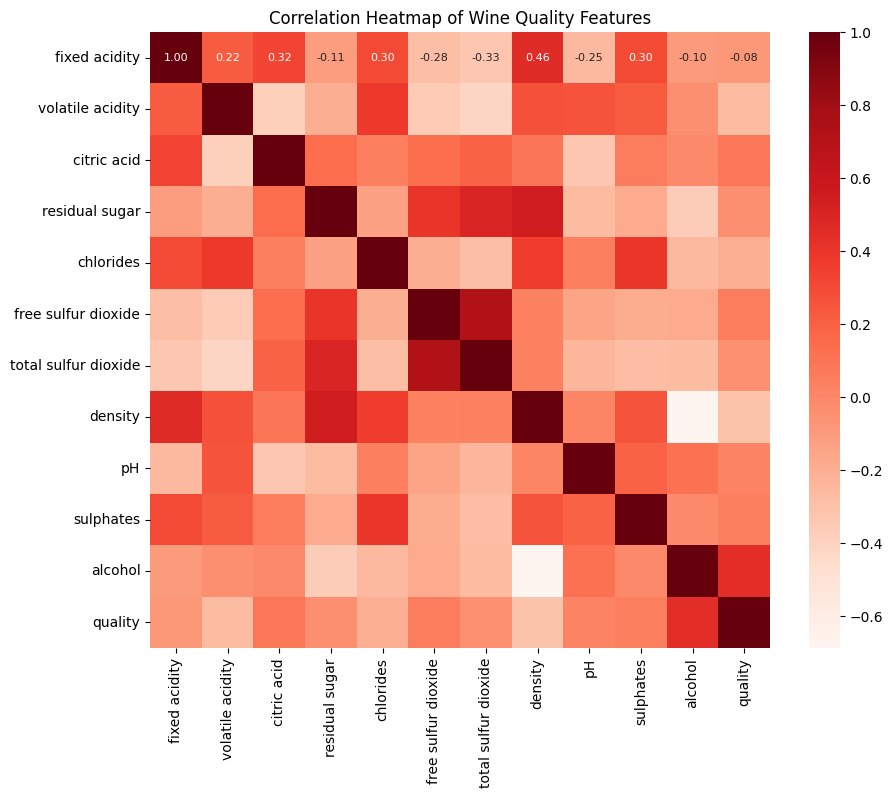

In [8]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cbar=True, annot=True, cmap='Reds', fmt=".2f", annot_kws={'size': 8})
plt.title("Correlation Heatmap of Wine Quality Features")
plt.show()

Define the quality categories with numerical labels

In [40]:
def categorize_quality(quality):
    if quality <= 4:
        return 0  # bad
    elif quality <= 6:
        return 1  # medium
    else:
        return 2  # good

Apply the categorization function to the 'quality' column

In [45]:
data['quality_category'] = data['quality'].apply(categorize_quality)

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [46]:
category_labels = {0: 'bad', 1: 'medium', 2: 'good'}
data['quality_category_label'] = data['quality_category'].map(category_labels)

 Visualize the distribution of the new quality categories

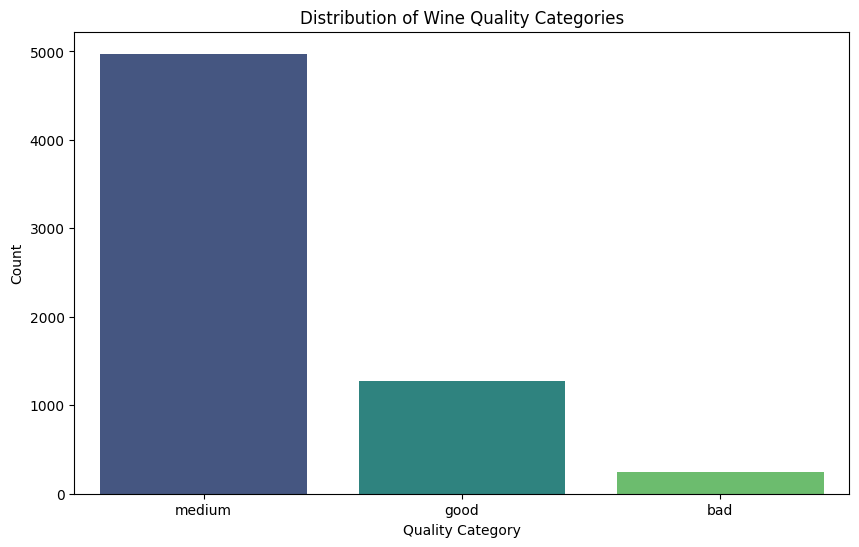

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='quality_category_label', palette='viridis')
plt.title('Distribution of Wine Quality Categories')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.show();

### 2.3. Data Splitting

Splitting the dataset into **training**, **validation**, and **testing** sets:

- **Training set (70%)**: Used to train the model. 
- **Validation set (15%)**: Used to optimize and select the best parameters.
- **Testing set (15%)**: Used to evaluate the final model.

In [51]:
X = data.drop(columns=['quality', 'quality_category', 'quality_category_label'])
y = data['quality_category']

Split the data into training, validation, and test sets

In [52]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Standardize the features

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

---

## 3. Model Training & Hyperparameter Tuning

We'll choose **three classification models** to compare: 

1. **Logistic Regression**
2. **Support Vector Machine (SVM)**
3. **Random Forest**

Define the models and their parameter grids

In [56]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': [0.01, 0.1, 1]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, 30, 40, 50]
        }
    }
}

Perform **GridSearchCV** for each model

In [58]:
best_models = {}
for model_name, model_info in models.items():
    clf = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    best_models[model_name] = clf.best_estimator_
    print(f"Best parameters for {model_name}: {clf.best_params_}")

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best parameters for Support Vector Machine: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best parameters for Random Forest: {'max_depth': 30, 'n_estimators': 100}


In [60]:
for model_name, model in best_models.items():
    y_pred = model.predict(X_valid)
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_valid, y_pred, zero_division=1))
    print(f"Confusion Matrix for {model_name}:\n")
    print(confusion_matrix(y_valid, y_pred))
    print("\n" + "-"*60 + "\n")

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        36
           1       0.80      0.97      0.88       755
           2       0.61      0.21      0.31       184

    accuracy                           0.79       975
   macro avg       0.80      0.39      0.40       975
weighted avg       0.77      0.79      0.74       975

Confusion Matrix for Logistic Regression:

[[  0  36   0]
 [  0 731  24]
 [  0 146  38]]

------------------------------------------------------------

Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        36
           1       0.83      0.97      0.89       755
           2       0.72      0.37      0.49       184

    accuracy                           0.82       975
   macro avg       0.85      0.45      0.46       975
weighted avg       0.81      0.82      0.7

---

## 4. Model Evaluation

### 4.1. Evaluation Metrics

**Evaluate the models** on the **validation set**

In [61]:
# Evaluate the best model on the test set
best_model_name = max(best_models, key=lambda name: best_models[name].score(X_valid, y_valid))
best_model = best_models[best_model_name]
y_test_pred = best_model.predict(X_test)
print(f"Best Model: {best_model_name}")
print(f"Classification Report on Test Set:\n")
print(classification_report(y_test, y_test_pred))
print(f"Confusion Matrix on Test Set:\n")
print(confusion_matrix(y_test, y_test_pred))

Best Model: Random Forest
Classification Report on Test Set:

              precision    recall  f1-score   support

           0       1.00      0.15      0.26        33
           1       0.86      0.96      0.90       747
           2       0.76      0.54      0.63       195

    accuracy                           0.85       975
   macro avg       0.87      0.55      0.60       975
weighted avg       0.84      0.85      0.83       975

Confusion Matrix on Test Set:

[[  5  28   0]
 [  0 714  33]
 [  0  89 106]]


### 4.2. Visualizations

---

## 5. Conclusion

- Summarize the findings and compare the models' performance.
- Discuss challenges and potential improvements.

---

## References

1. [Red Wine Quality Prediction Using Regression Modeling and Machine Learning - Dexter Nguyen](https://towardsdatascience.com/red-wine-quality-prediction-using-regression-modeling-and-machine-learning-7a3e2c3e1f46)
2. [scikit-learn Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html)
3. [Random Forest Algorithm in Machine Learning - GeeksForGeeks](https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/)
